# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [59]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import weather_api_key
import random
import json

ImportError: cannot import name 'st' from 'scipy.stats' (C:\Users\Ward33\anaconda3\lib\site-packages\scipy\stats\__init__.py)

## Generate Cities List

In [51]:
# Read json of cities and city IDs
citylist = pd.read_json('F:\Matt\GitHome\py-api-challenge\citylist.json')
# Select sample of cities
cityselect = pd.DataFrame(citylist.sample(600))
cityselect.head()

,id,name,state,country,coord
109817,3069785,Neveklov,,CZ,"{'lon': 14.53291, 'lat': 49.753731}"
175830,6439201,Parfondeval,,FR,"{'lon': 0.5, 'lat': 48.48333}"
49313,2108502,Honiara,,SB,"{'lon': 159.949997, 'lat': -9.43333}"
27858,1266931,Khargāpur,,IN,"{'lon': 79.143997, 'lat': 24.823}"
40907,1795691,Shengang,,CN,"{'lon': 120.138412, 'lat': 31.88661}"


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Base url
url = ' http://api.openweathermap.org/data/2.5/weather?'
# Test city w/o loop
#cityname = cityselect.iloc[0]['name']
#cityID = cityselect.iloc[0]['id']
# Test list
#testlist = cityselect.iloc[0:10]

# Create lists to store responses
ID = []
name = []
clouds = []
humidity = []
temp = []
max_temp = []
wind_spd = []
lat = []
# Loop through cities
for index,row in cityselect.iterrows():
    # Print each city and ID number
    print (f"Trying {row['name']} with ID {row['id']}")
    try:
        # build query url
        query_url = f"{url}appid={weather_api_key}&id={row['id']}&units=imperial"
        # request data for each city
        response = requests.get(query_url).json()
        # append values to lists
        ID.append(row['id'])
        name.append(row['name'])
        clouds.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        wind_spd.append(response['wind']['speed'])
        lat.append(row['coord']['lat'])
    except:
        print('Error: ID not found')


  

Trying Crestuma with ID 2740282
Trying Sparta with ID 4409615
Trying Wormsleben with ID 2806136
Trying Lymanske with ID 703061
Trying Gavril Genovo with ID 6459238
Trying Shmatovo with ID 493930
Trying North Haledon with ID 5101922
Trying Zöllnitz with ID 6550426
Trying Rŭshon with ID 1220685
Trying Hamilton with ID 5119842
Trying Wiślica with ID 755593
Trying Sebastopol with ID 5394165
Trying Homer with ID 5121169
Trying Järvsö with ID 2703145
Trying Komuna e Gjilanit with ID 790673
Trying Tanjungan with ID 8074553
Trying Volodarskoye with ID 1517410
Trying Serranillos del Valle with ID 3109077
Trying Camphin-en-Pévèle with ID 3028946
Trying Hubbard Lake with ID 4996690
Trying Moita with ID 2266319
Trying Holzkirchen with ID 2899676
Trying Idanha with ID 2267428
Trying Obergailbach with ID 6437762
Trying Liu’ao with ID 7070567
Trying Patuto with ID 1694290
Trying Jabłonna with ID 770706
Trying Zimmern unter der Burg with ID 2804157
Trying Elsterwerda with ID 2930680
Trying Libuganon w

Trying Anamur with ID 323828
Trying Călineşti with ID 682953
Trying Waltensburg/Vuorz with ID 7287534
Trying Cuffy with ID 3022154
Trying Bihu with ID 6982907
Trying Daultala with ID 1180379
Trying North Bend with ID 5804915
Trying Saint-Ouen-de-Thouberville with ID 2977808
Trying Hilmar-Irwin with ID 7261441
Trying Luis M. Cintron with ID 4566098
Trying Volterra with ID 3163962
Trying Castelfranco Emilia with ID 6541633
Trying Valley City with ID 5062292
Trying Berghem with ID 7670962
Trying Kanwar with ID 1265567
Trying Yangmei with ID 1787409
Trying Jammalamadugu with ID 1269323
Trying Okrika with ID 2326899
Trying Kegelheim with ID 2891964
Trying Hodh El Gharbi with ID 2379024
Trying Freeburgh with ID 2166109
Trying Biard with ID 6455306
Trying Brädikow with ID 2945576
Trying McCamey with ID 5525938
Trying Gumpertshausen with ID 2913731
Trying Berrydale with ID 4147390
Trying Casalnoceto with ID 3180173
Trying Rentung with ID 7570522
Trying Arbis with ID 3037295
Trying Alindao with

Trying Międzyrzec Podlaski with ID 7531692
Trying Saint-Antoine-de-Ficalba with ID 2981672
Trying Windsor with ID 4983283
Trying San Salvatore di Fitalia with ID 2523375
Trying Blagodatnoye with ID 576147
Trying Ilorin with ID 2337639
Trying Zinacantepec with ID 3518221
Trying Berdyaush with ID 577450
Trying Ban Pakla with ID 1655186
Trying Eleanor with ID 4804927
Trying Lugrin with ID 2997158
Trying Novosibirsk with ID 1496747
Trying Dausse with ID 6613035
Trying Sembabule with ID 226361
Trying Zawātā with ID 281236
Trying Powiat międzyrzecki with ID 7530979
Trying Carrilobo with ID 3862515
Trying Pazar with ID 740677
Trying Inzell with ID 6556400
Trying Tolga with ID 3134404
Trying Upper Sturt with ID 2059582
Trying Glenview with ID 4893886
Trying Villefranche-de-Rouergue with ID 6427081
Trying Otis Orchards-East Farms with ID 7262053
Trying Fuerte del Rey with ID 2517482
Trying Krasnyye Barrikady with ID 541795
Trying Eltz with ID 2960614
Trying Kassab with ID 168519
Trying Yesan wi

In [4]:
#--- TEST CELL ---
# This cell was for testing json locations and dataframe construction. Preserved in comments for reference.

# response['clouds']['all'] = clouds
# response['main']['humidity'] = humidity
# response['main']['temp'] = temp
# response['main']['temp_max'] = max temp
# response['wind']['speed'] = wind speed

# ID = cityID
# name = cityname
# clouds = response['clouds']['all']
# humidity = response['main']['humidity']
# temp = response['main']['temp']
# max_temp = response['main']['temp_max']
# wind_spd = response['wind']['speed']

# weather_df = pd.DataFrame({
#     'name' : [name],
#     'clouds' : [clouds],
#     'humidity' : [humidity],
#     'temp' : [temp],
#     'max_temp' : [max_temp],
#     'wind_spd' : [wind_spd]
# })
# weather_df
# --- END ---

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Assemble dataframe
weather_df = pd.DataFrame({
    'name' : name,
    'clouds' : clouds,
    'humidity' : humidity,
    'temp' : temp,
    'max_temp' : max_temp,
    'wind_spd' : wind_spd,
    'lat' : lat
})

weather_df.to_csv('outputs\weatherdata.csv')
weather_df.head()

,name,clouds,humidity,temp,max_temp,wind_spd,lat
0,Crestuma,81,81,55.99,55.99,1.99,41.065609
1,Sparta,0,26,78.89,80.01,1.99,37.001160
2,Wormsleben,100,83,48.00,50.00,7.87,51.516670
3,Lymanske,75,100,68.00,68.00,17.90,46.655701
4,Gavril Genovo,73,10,50.76,52.00,3.78,43.397499


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
if weather_df['humidity'].max()<=100:
    print('No cities with over 100% humidity')

No cities with over 100% humidity


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

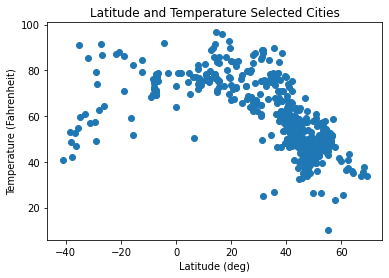

In [26]:
fig1, ax1 = plt.subplots()
ax1.set_title('Latitude and Temperature Selected Cities')
ax1.set_xlabel('Latitude (deg)')
ax1.set_ylabel('Temperature (Fahrenheit)')
ax1.scatter(weather_df['lat'], weather_df['temp'])
plt.savefig('outputs/LatTemp.png')

This plot shows the relationship between a city's latitude and current temperature. It shows that cities near the equator tended to have higher temperatures while cities in further the equator have low temperatures. The correlation appears sinusoidal. 

## Latitude vs. Humidity Plot

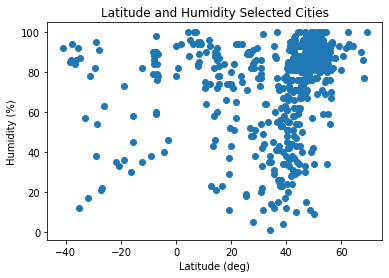

In [27]:
fig2, ax2 = plt.subplots()
ax2.set_title('Latitude and Humidity Selected Cities')
ax2.set_xlabel('Latitude (deg)')
ax2.set_ylabel('Humidity (%)')
ax2.scatter(weather_df['lat'], weather_df['humidity'])
plt.savefig('outputs/LatHumid.png')

This plot shows the relationship between a city's latitude and current humidity. It does not show an apparent relationship between humidity and latitude. 

## Latitude vs. Cloudiness Plot

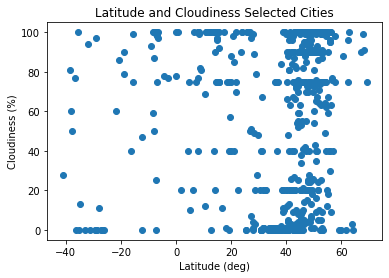

In [28]:
fig3, ax3 = plt.subplots()
ax3.set_title('Latitude and Cloudiness Selected Cities')
ax3.set_xlabel('Latitude (deg)')
ax3.set_ylabel('Cloudiness (%)')
ax3.scatter(weather_df['lat'], weather_df['clouds'])
plt.savefig('outputs/LatCloud.png')

This plot shows the relationship between a city's latitude and current cloudiness. It does not show an apparent relationship between cloudiness and latitude. 

## Latitude vs. Wind Speed Plot

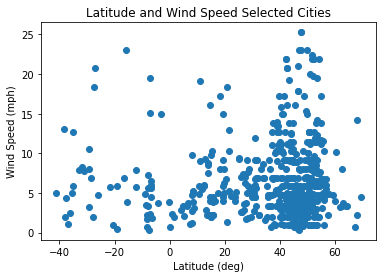

In [29]:
fig4, ax4 = plt.subplots()
ax4.set_title('Latitude and Wind Speed Selected Cities')
ax4.set_xlabel('Latitude (deg)')
ax4.set_ylabel('Wind Speed (mph)')
ax4.scatter(weather_df['lat'], weather_df['wind_spd'])
plt.savefig('outputs/LatWind.png')

This plot shows the relationship between a city's latitude and current wind speed. It does not show an apparent relationship between humidity and wind speed. 

## Linear Regression

In [33]:
# Split cities in norther nand southern hemispheres
north_cities = weather_df[weather_df['lat']>0]
south_cities = weather_df[weather_df['lat']<0]
north_cities

,name,clouds,humidity,temp,max_temp,wind_spd,lat
0,Crestuma,81,81,55.99,55.99,1.99,41.065609
1,Sparta,0,26,78.89,80.01,1.99,37.001160
2,Wormsleben,100,83,48.00,50.00,7.87,51.516670
3,Lymanske,75,100,68.00,68.00,17.90,46.655701
4,Gavril Genovo,73,10,50.76,52.00,3.78,43.397499
...,...,...,...,...,...,...,...
595,Kinatakutan,100,90,77.11,77.11,8.57,13.952500
596,Bucha,100,77,42.67,43.00,1.01,50.633331
597,Sant'Antonio di Gallura,40,67,60.80,60.80,14.99,40.991070
598,Moguer,0,41,68.00,68.00,11.01,37.246189


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6143610125687893


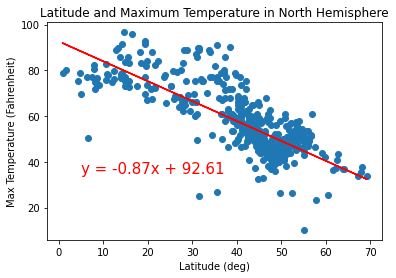

In [61]:
x_values = north_cities['lat']
y_values = north_cities['max_temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,35),fontsize=15,color="red")
plt.xlabel('Latitude (deg)')
plt.ylabel('Max Temperature (Fahrenheit)')
plt.title('Latitude and Maximum Temperature in the Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.22379917626082635


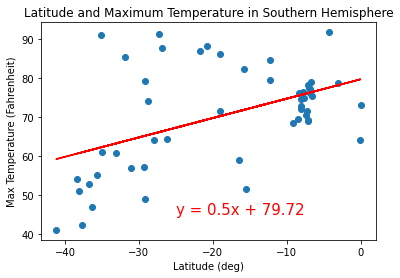

In [63]:
x_values = south_cities['lat']
y_values = south_cities['max_temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,45),fontsize=15,color="red")
plt.xlabel('Latitude (deg)')
plt.ylabel('Max Temperature (Fahrenheit)')
plt.title('Latitude and Maximum Temperature in the Southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The two plots above show linear regressions for latitude and maximum temperature in the northern and southern hemispheres. The northern hemisphere shows a stronger, negative correlation, and the southern hemisphere shows a weaker, positive correlation. These results suggest that temperatures near the equator tend to be higher. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.060454381803893446


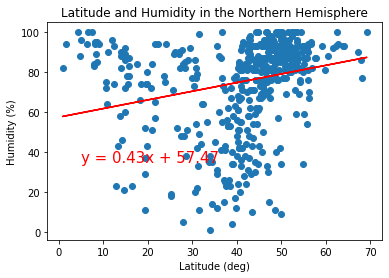

In [64]:
x_values = north_cities['lat']
y_values = north_cities['humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,35),fontsize=15,color="red")
plt.xlabel('Latitude (deg)')
plt.ylabel('Humidity (%)')
plt.title('Latitude and Humidity in the Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.009242594929388084


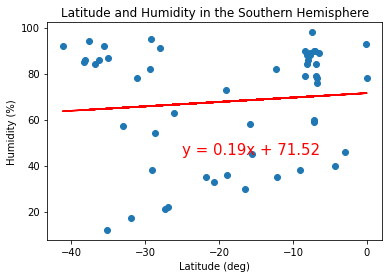

In [66]:
x_values = south_cities['lat']
y_values = south_cities['humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,45),fontsize=15,color="red")
plt.xlabel('Latitude (deg)')
plt.ylabel('Humidity (%)')
plt.title('Latitude and Humidity in the Southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The two plots above show linear regressions for latitude and humidity in the northern and southern hemispheres. Both hemispheres do not show a correlation between these variables. Investigation of other geographic factors such as proximity to bodies of water may show better results.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.011823923257343242


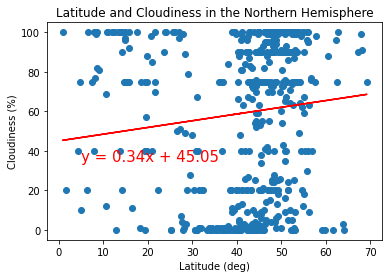

In [67]:
x_values = north_cities['lat']
y_values = north_cities['clouds']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,35),fontsize=15,color="red")
plt.xlabel('Latitude (deg)')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude and Cloudiness in the Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.24776553243999463


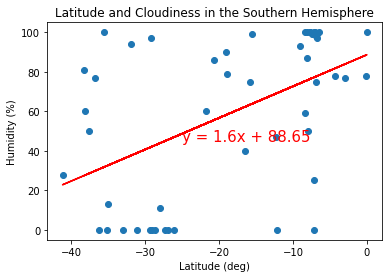

In [68]:
x_values = south_cities['lat']
y_values = south_cities['clouds']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,45),fontsize=15,color="red")
plt.xlabel('Latitude (deg)')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude and Cloudiness in the Southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The two plots above show linear regressions for latitude and cloudiness in the northern and southern hemispheres. The northern hemisphere shows no correlation between cloudiness and latitude. The southern hemisphere shows a weak, positive correlation. It may suggest some relationship, but it also may be coincidence driven by unrelated weather phenomena.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0033251314629538795


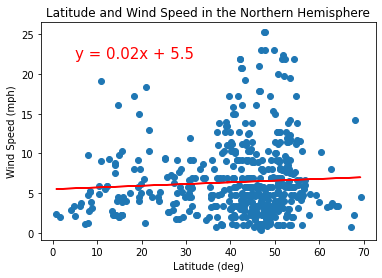

In [70]:
x_values = north_cities['lat']
y_values = north_cities['wind_spd']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,22),fontsize=15,color="red")
plt.xlabel('Latitude (deg)')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude and Wind Speed in the Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.011909319895314192


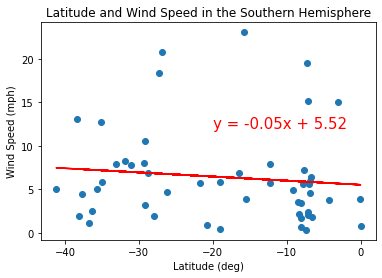

In [72]:
x_values = south_cities['lat']
y_values = south_cities['wind_spd']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,12),fontsize=15,color="red")
plt.xlabel('Latitude (deg)')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude and Wind Speed in the Southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The two plots above show linear regressions for latitude and wind speed in the northern and southern hemispheres. Both hemispheres do not show a correlation between these variables. Investigation of other geographic factors such as proximity to bodies of water or mountain ranges may show better results.